# Business Understanding
## Overview
Abalone is a type of shellfish that is used as both a food source and a decorative object. They are a good source of high protein and include a variety of minerals and vital vitamins, including pantothenic acid (iron). Our bodies can benefit from abalone in many ways, including improved appetite, healthy eyes, and a stronger immune system. 

## Problem Statement
Age and the economic worth of abalone are positively connected. Therefore, it's critical for both farmers and consumers to precisely estimate the age of abalone in order to set its price. However, the technology used to determine age nowadays is quite expensive and ineffective. Cutting the shell through the cone, staining it, and counting the number of rings under a microscope a tedious process—are used to establish the age of abalone.
The age is predicted using other, simpler measurements. To fix the issue, other details could be needed, such as local weather patterns and food availability. However, for this issue, we'll suppose that the abalone's physical characteristics are sufficient to determine its age precisely.

## Objectives
* How does weight change with age for each of the three sex categories?
* Can you estimate an abalone's age using its physical characteristics?
* Investigate which variables are better predictors of age for abalones.
* Create a model that can predict the age of abalone.

## Business Success Criteria
A simplified method of determining the age of abalones based on morphological qualities

## Metric of Success
Create a model with an accuracy of 85%.

## project plan
* Business Understanding
* Data Understanding
* Data Preparation
* Exploratory Data Analysis
* Data Preparation
* Modeling

# Data Understanding
## Overview
Using data from [abalone data](https://archive.ics.uci.edu/ml/datasets/abalone), I will examine the physical properties of abalone that can be used to identify its age. I will also develop a model to assist farmers and buyers in predicting the age of abalone.'

## Data Description
`age` of abalone is the target variable.


The predictor variables in this data include:

`sex` - M, F, and I (infant).

`length` - longest shell measurement.

`diameter` - perpendicular to the length.

`height` - measured with meat in the shell.

`whole_wt` - whole abalone weight.

`shucked_wt` - the weight of abalone meat.

`viscera_wt` - gut-weight.

`shell_wt` - the weight of the dried shell.

`rings` - number of rings in a shell cross-section.

In [1]:
#importing necessary libraries
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

sns.set_style('darkgrid')
plt.style.use('ggplot')

In [2]:
#Loading data using pandas
abalone_df = pd.read_csv('data/abalone.csv')
# previewing first five rows of the dataset
abalone_df.head()

,sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [3]:
# Previewing the last five rows of the dataset
abalone_df.tail()

,sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
1995,I,0.320,0.240,0.07,0.1330,0.0585,0.0255,0.0410,6,7.5
1996,I,0.325,0.250,0.07,0.1745,0.0875,0.0355,0.0400,7,8.5
1997,I,0.335,0.250,0.08,0.1695,0.0695,0.0440,0.0495,6,7.5
1998,I,0.350,0.235,0.08,0.1700,0.0725,0.0465,0.0495,7,8.5
1999,I,0.350,0.250,0.07,0.1605,0.0715,0.0335,0.0460,6,7.5


In [4]:
# getting the shape of the data
print(f'The dataset has {abalone_df.shape[0]} rows and {abalone_df.shape[1]} columns')

The dataset has 2000 rows and 10 columns


### Preliminary Data Inspection

In [5]:
# Getting the 'data' about the data
abalone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         2000 non-null   object 
 1   length      2000 non-null   float64
 2   diameter    2000 non-null   float64
 3   height      2000 non-null   float64
 4   whole_wt    2000 non-null   float64
 5   shucked_wt  2000 non-null   float64
 6   viscera_wt  2000 non-null   float64
 7   shell_wt    2000 non-null   float64
 8   rings       2000 non-null   int64  
 9   age         2000 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 156.4+ KB


In [6]:
# Obtaining the summary descriptive statistics of the data
abalone_df.describe().T

,count,mean,std,min,25%,50%,75%,max
length,2000.0,0.521828,0.122215,0.0750,0.450000,0.545,0.610000,0.8150
diameter,2000.0,0.406445,0.101347,0.0550,0.345000,0.425,0.480000,0.6500
height,2000.0,0.138965,0.039700,0.0000,0.115000,0.140,0.165000,0.5150
whole_wt,2000.0,0.824127,0.496550,0.0020,0.433875,0.800,1.137125,2.8255
shucked_wt,2000.0,0.357067,0.226013,0.0010,0.181000,0.336,0.498125,1.4880
viscera_wt,2000.0,0.179573,0.110361,0.0005,0.092000,0.170,0.249500,0.7600
shell_wt,2000.0,0.237435,0.141011,0.0015,0.125000,0.234,0.325000,1.0050
rings,2000.0,9.939500,3.320897,1.0000,8.000000,9.000,11.000000,29.0000
age,2000.0,11.439500,3.320897,2.5000,9.500000,10.500,12.500000,30.5000


In [7]:
# Getting the data types of the data
abalone_df.dtypes.value_counts()

float64    8
object     1
int64      1
dtype: int64

There are 9 numerical features and one categorical features.

In [8]:
# Checking values present in sex column
abalone_df['sex'].value_counts()

M    736
I    652
F    612
Name: sex, dtype: int64

# Data Preparation
## Overview
To improve the model's performance and avoid the development of incorrect knowledge, data must be prepared before being staged for modeling. In this section i will check for missing values, duplicated entries, discrepancies, and inaccurate data throughout this part of the examination.

## Data Cleaning

In [9]:
# Checking for duplicates 
abalone_df.duplicated().sum()

0

The dataset does not contain any duplicated values

In [10]:
abalone_df.isna().sum()

sex           0
length        0
diameter      0
height        0
whole_wt      0
shucked_wt    0
viscera_wt    0
shell_wt      0
rings         0
age           0
dtype: int64

The dataset does not have missing values.

# Exploratory Data Analysis
In this phase of the investigation, the study will look at the trends, patterns using visualizations and statistics to show the relationships between the variables within the data.

## Univariate Analysis

### Feature `sex`

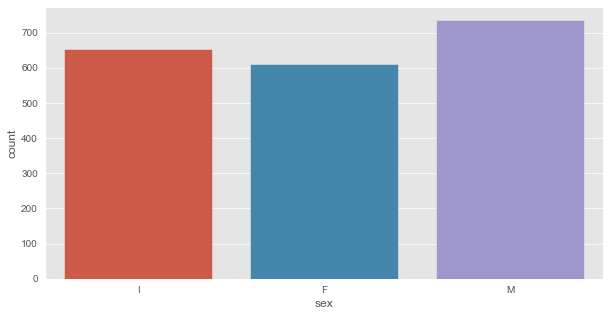

In [11]:
#plotting frequency of sex
plt.figure(figsize=(10,5))
sns.countplot(x = abalone_df['sex'],order=['I','F','M'])
plt.show()

#### Observation
According to the analysis, there are many male abalones than infants and females.

### Feature `length`

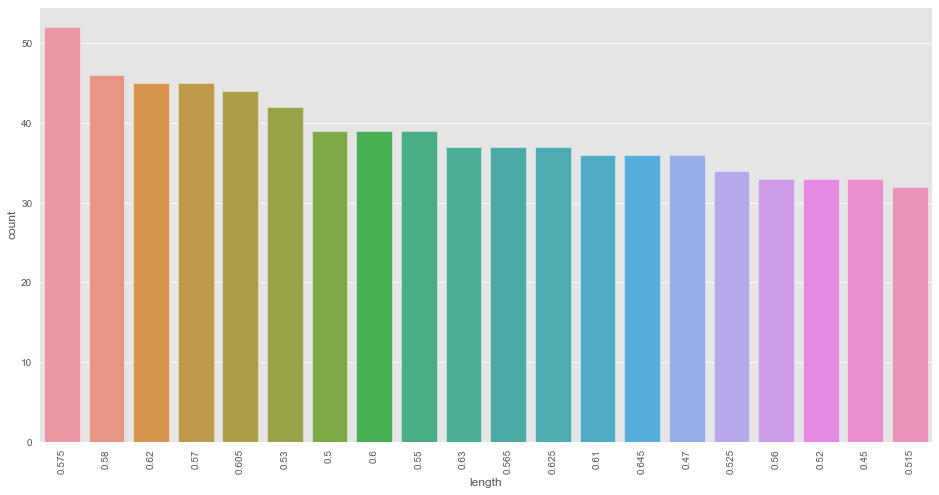

In [12]:
# plotting the most frequent abalone length
plt.figure(figsize=(16,8))
sns.countplot(x = abalone_df['length'],
              order = abalone_df['length'].value_counts().index[:20])
plt.xticks(rotation=90)
plt.show()

#### Observation
According to the analysis, most abalone are 0.575 millimeters in length.

### Feature `diameter`

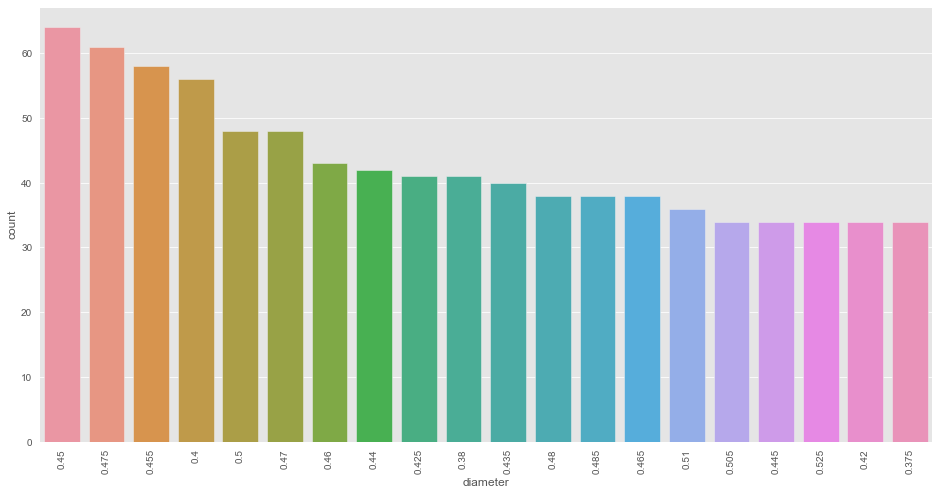

In [13]:
# plotting the most frequenct abalone diameter
plt.figure(figsize=(16,8))
sns.countplot(x = abalone_df['diameter'],
              order = abalone_df['diameter'].value_counts().index[:20])
plt.xticks(rotation=90)
plt.show()

#### Observation
According to the analysis, most abalone have a diameter of 0.45 millimeters.

### Feature `height`

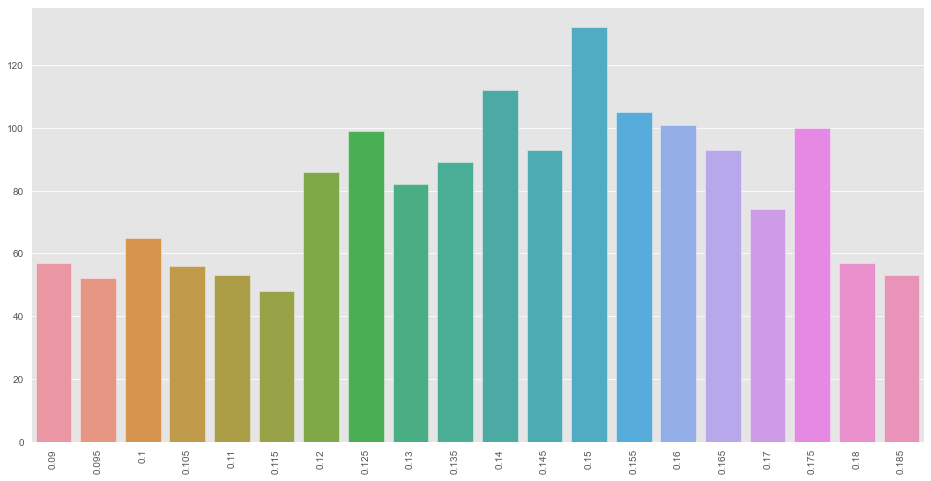

In [14]:
# plotting the most frequent abalone length
plt.figure(figsize=(16,8))
sns.barplot(x= abalone_df['height'].value_counts().index[:20],
            y =abalone_df['height'].value_counts().values[:20])
plt.xticks(rotation=90)
plt.show()

#### Observation
Most of the abalones have a height of 0.15 millimeter.

### Feature `whole_wt`

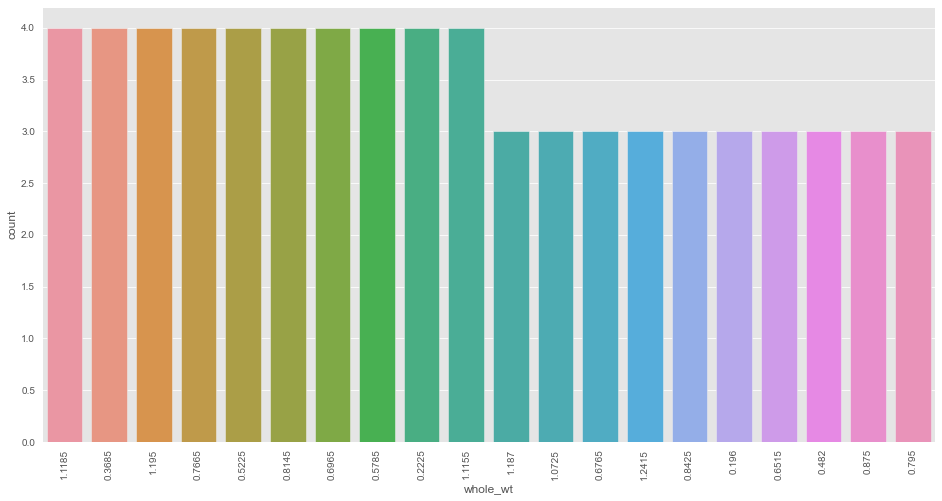

In [15]:
# plotting the whole weight of abalone
plt.figure(figsize=(16,8))
sns.countplot(x = abalone_df['whole_wt'],
              order = abalone_df['whole_wt'].value_counts().index[:20])
plt.xticks(rotation=90)
plt.show()

### Feature `shucked_wt`

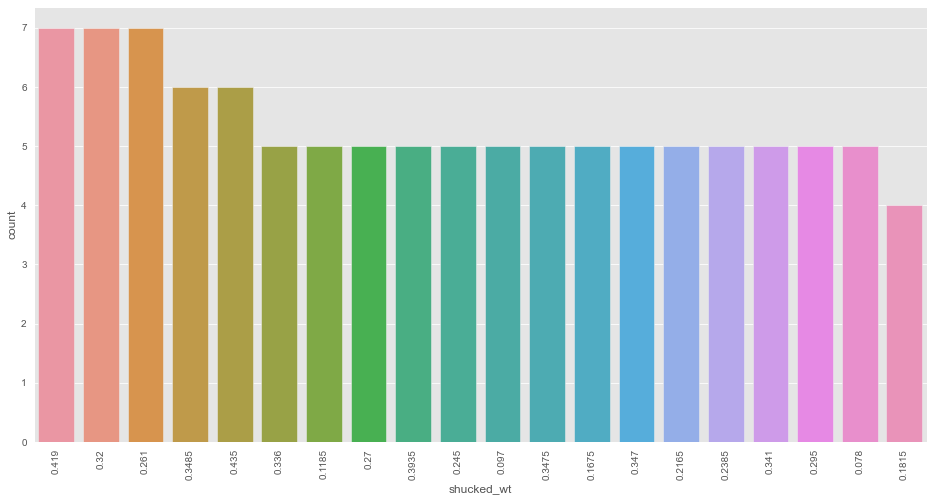

In [16]:
# plotting the shucked weight of abalone
plt.figure(figsize=(16,8))
sns.countplot(x = abalone_df['shucked_wt'],
              order = abalone_df['shucked_wt'].value_counts().index[:20])
plt.xticks(rotation=90)
plt.show()

#### Observations
most of the abalone has a shucked weight of 0.419,0.32 and 0.261.

### Feature `viscera_wt`

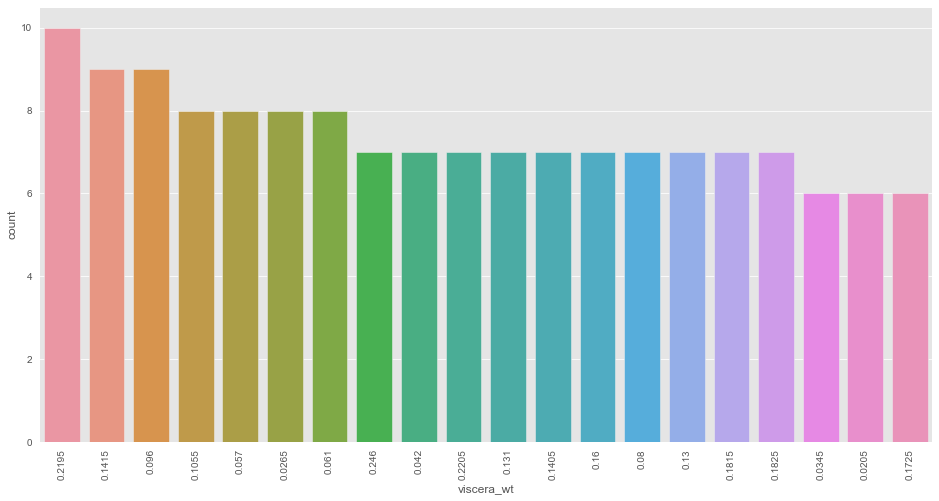

In [17]:
# plotting the most frequeng abalone length
plt.figure(figsize=(16,8))
sns.countplot(x = abalone_df['viscera_wt'],
              order = abalone_df['viscera_wt'].value_counts().index[:20])
plt.xticks(rotation=90)
plt.show()

#### Observations
most of the abalone has a gut weight of 0.2195

### Feature `shell_wt`

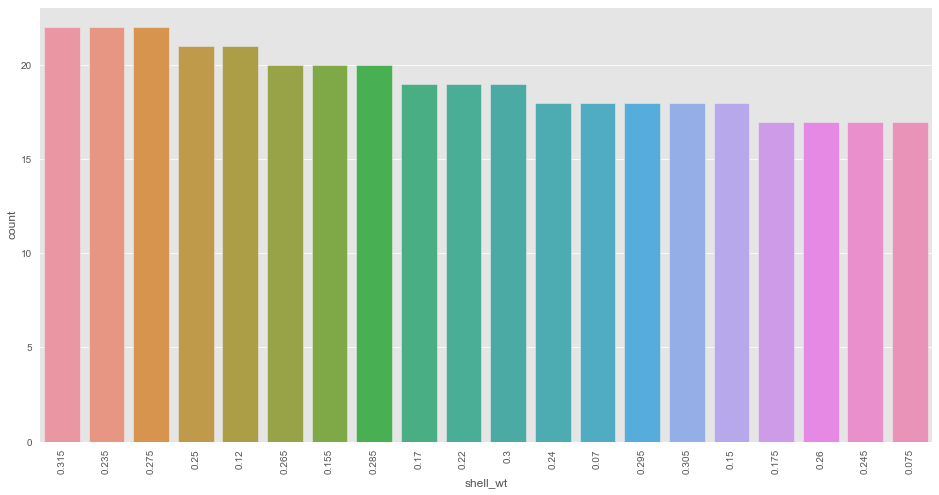

In [18]:
# plotting the most frequeng abalone length
plt.figure(figsize=(16,8))
sns.countplot(x = abalone_df['shell_wt'],
              order = abalone_df['shell_wt'].value_counts().index[:20])
plt.xticks(rotation=90)
plt.show()

#### Observations
Most of the dried abalone shell has a weight of 0.315 or 0.235 or 0.275.

### Feature `rings`

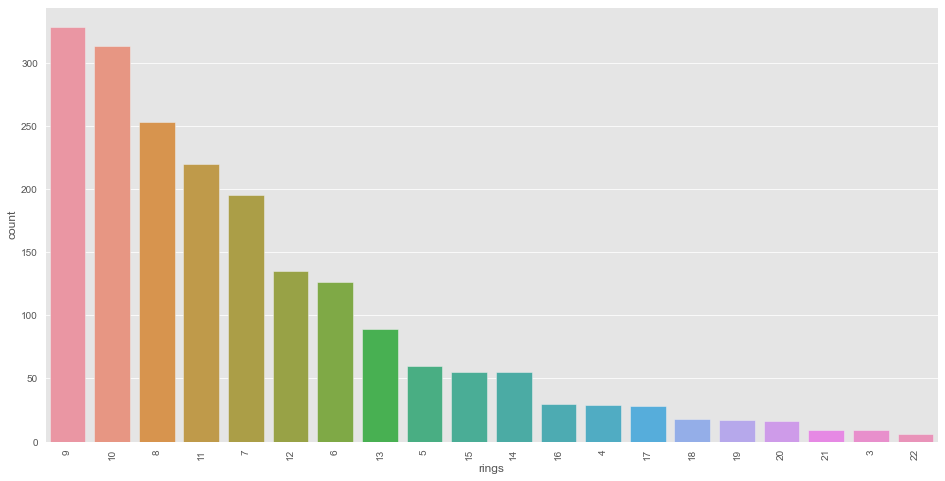

In [19]:
# plotting the most frequeng abalone length
plt.figure(figsize=(16,8))
sns.countplot(x = abalone_df['rings'],
              order = abalone_df['rings'].value_counts().index[:20])
plt.xticks(rotation=90)
plt.show()

#### Observations
Most abalones have 9 rings

### Feature `age`

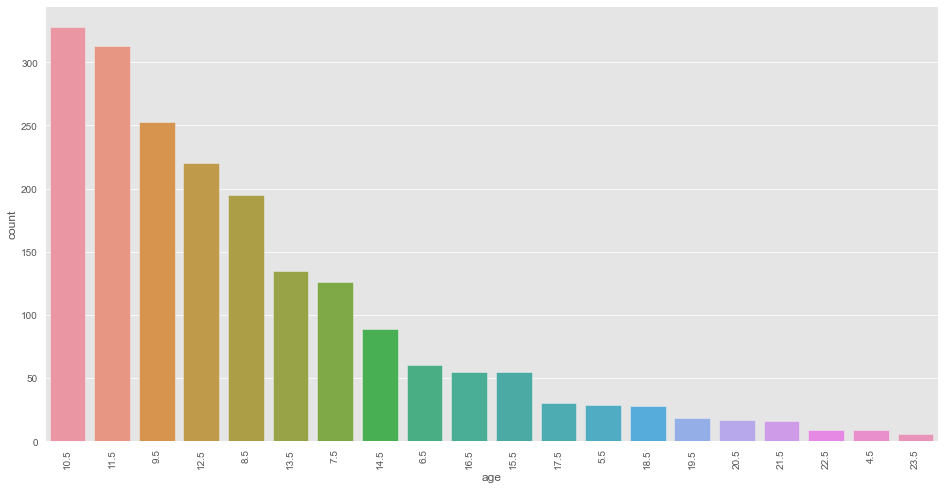

In [20]:
# plotting the most frequeng abalone length
plt.figure(figsize=(16,8))
sns.countplot(x = abalone_df['age'],
              order = abalone_df['age'].value_counts().index[:20])
plt.xticks(rotation=90)
plt.show()

#### Observations
Most of the abalones are 10.5 years meaning they have 9 rings.

## Bivariate Analysis

### `Sex` and `age`

In [21]:
# Grouping age with sex
sex_age_df =(
    abalone_df
    .groupby('sex')
    .age.mean()
    .reset_index()
)

sex_age_df

,sex,age
0,F,12.764706
1,I,9.329755
2,M,12.206522


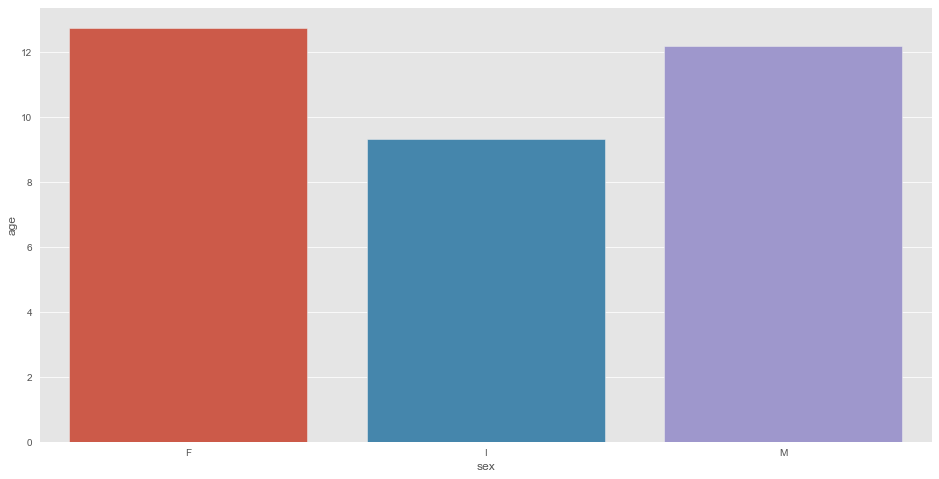

In [22]:
# Bar plot for age grouped with sex
plt.figure(figsize=(16,8))
sns.barplot(data= sex_age_df,x= 'sex',y= 'age')
plt.show()

#### Observations
Most female abalone are aged but sex is not a predictor of age.

### `length` and `age`

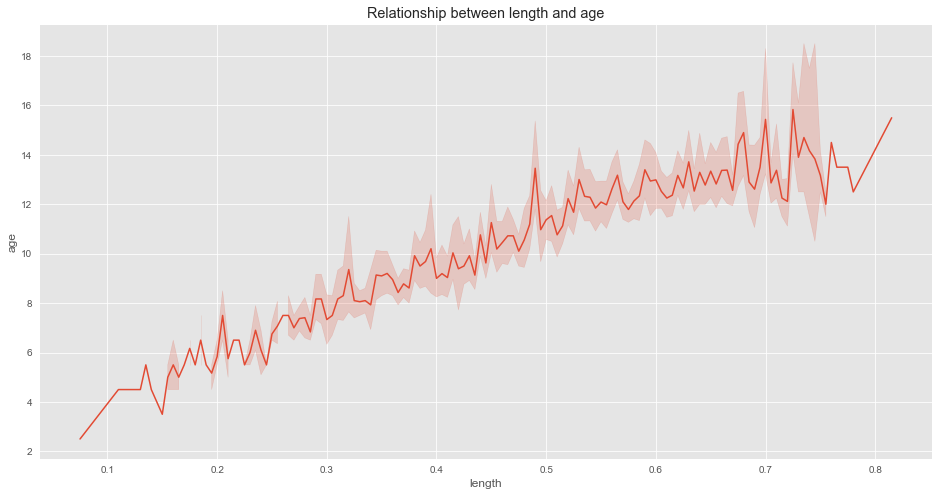

In [23]:
# line plot showing the relationship between the length and age of abalones
plt.figure(figsize =(16,8))
sns.lineplot(data=abalone_df, x='length',
             y='age').set(title = 'Relationship between length and age')
plt.show()

#### Observations
According to the analysis as length of abalones shell increase the age increase. This means length can be a predictor for age.

### `diameter` and `age`

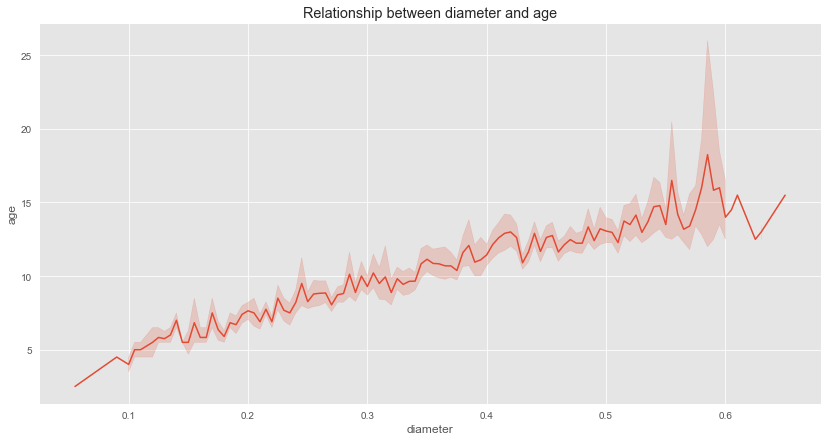

In [24]:
# line plot showing the relationship between diameter and age
plt.figure(figsize =(14,7))
sns.lineplot(data=abalone_df, x= 'diameter',
             y='age').set(title = 'Relationship between diameter and age')
plt.show()

#### Observation
As the diameter of abalones shell increase the age increase. Diameter is a predictor for age.

### `height` and `age`

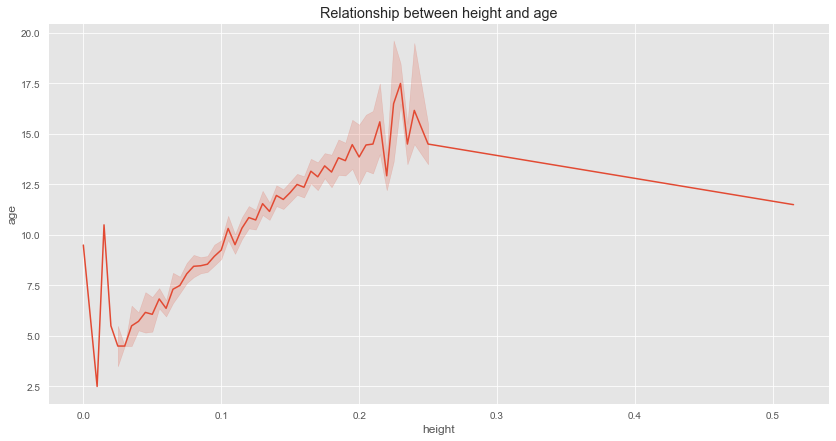

In [25]:
# line plot showing the relationship between height and age
plt.figure(figsize =(14,7))
sns.lineplot(data=abalone_df, x='height',
             y='age').set(title = 'Relationship between height and age')
plt.show()

#### Observation
Age increases as height increases, but it reaches a point when age decreases as height increases, indicating that height is not a reliable predictor of age.

### `whole_wt` and `age`

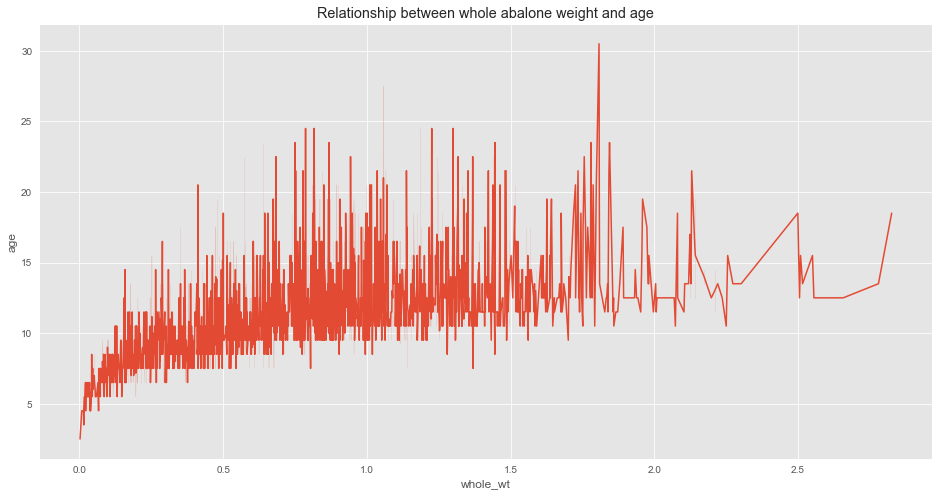

In [26]:
# line plot showing the relationship between whole_wt and age
plt.figure(figsize=(16,8))
sns.lineplot(data=abalone_df, x='whole_wt',
             y='age').set_title('Relationship between whole abalone weight and age')
plt.show()

#### Observation
Whole abalone weight, according to the study, is not a good predictor of age because some older abalones weigh less than younger ones.

### `shucked_wt` and `age`

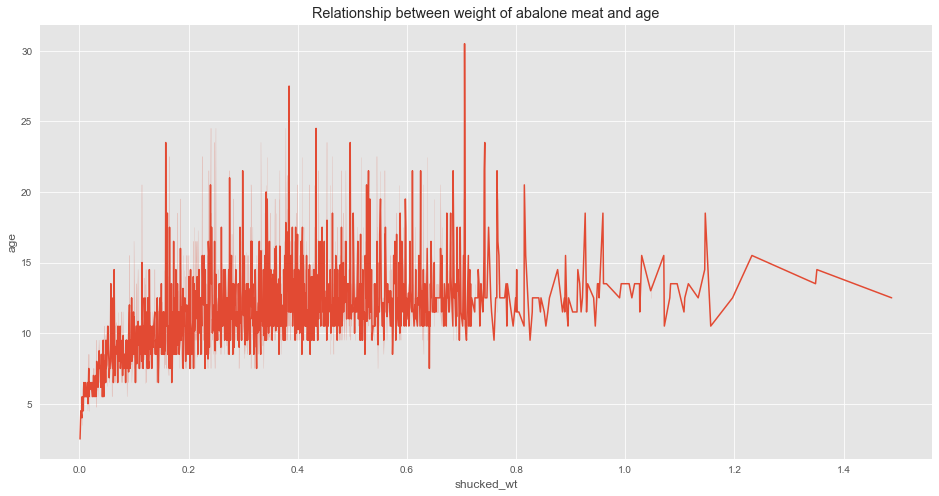

In [27]:
# line plot showing the relationship between shucked_wt and age
plt.figure(figsize=(16,8))
sns.lineplot(data=abalone_df, x='shucked_wt',
             y='age').set_title('Relationship between weight of abalone meat and age')
plt.show()

#### Observation
Weight of abalone meat, according to the study, is not a good predictor of age because some older abalones weigh less than younger ones.

### `viscera_wt` and `age`

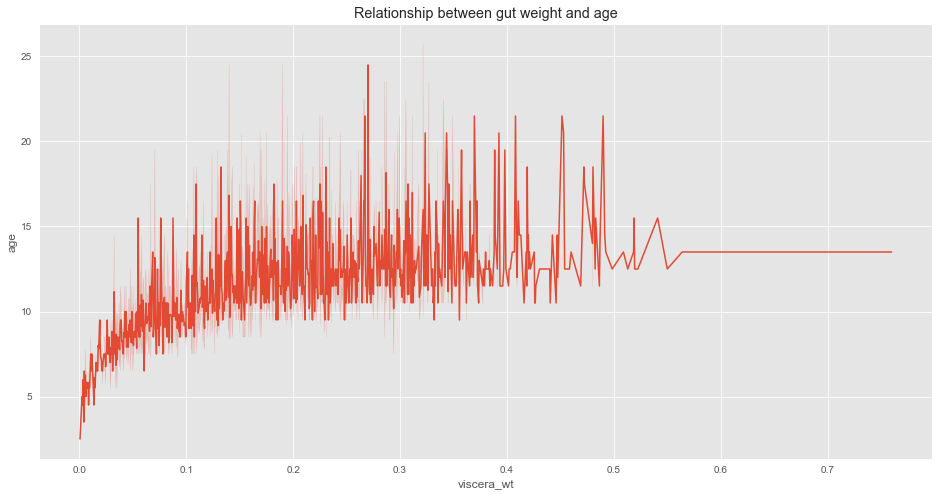

In [28]:
# line plot showing the relationship between viscera_wt and age
plt.figure(figsize=(16,8))
sns.lineplot(data=abalone_df, x='viscera_wt',
             y='age').set_title('Relationship between gut weight and age')
plt.show()

#### Observations
Gut weight is not a good predictor of age because some older abalones weigh less than younger ones.

### `shell_wt` and `age`

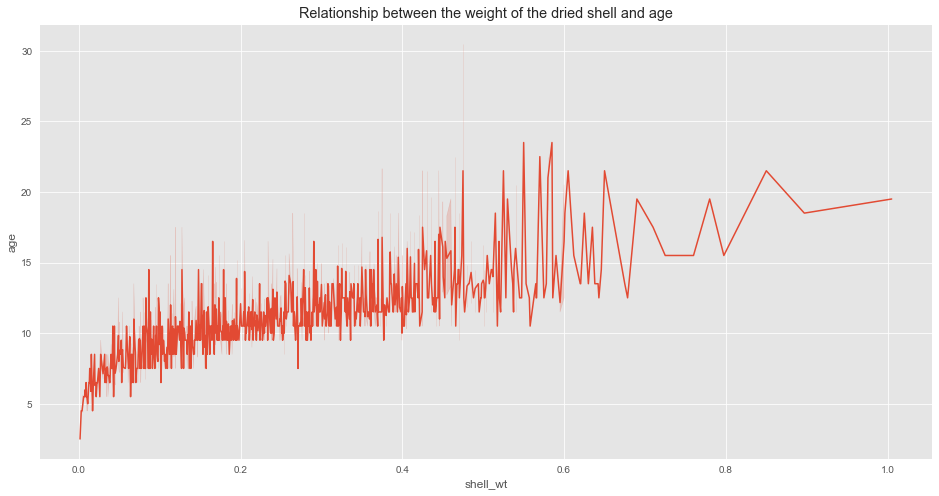

In [29]:
# line plot showing the relationship between viscera_wt and age
plt.figure(figsize=(16,8))
sns.lineplot(data=abalone_df, x='shell_wt',
             y='age').set_title('Relationship between the weight of the dried shell and age')
plt.show()

#### Observations
Although this is not a reliable indicator of age, the weight of the dried shell seems to grow along with age.

### `rings` and `age`

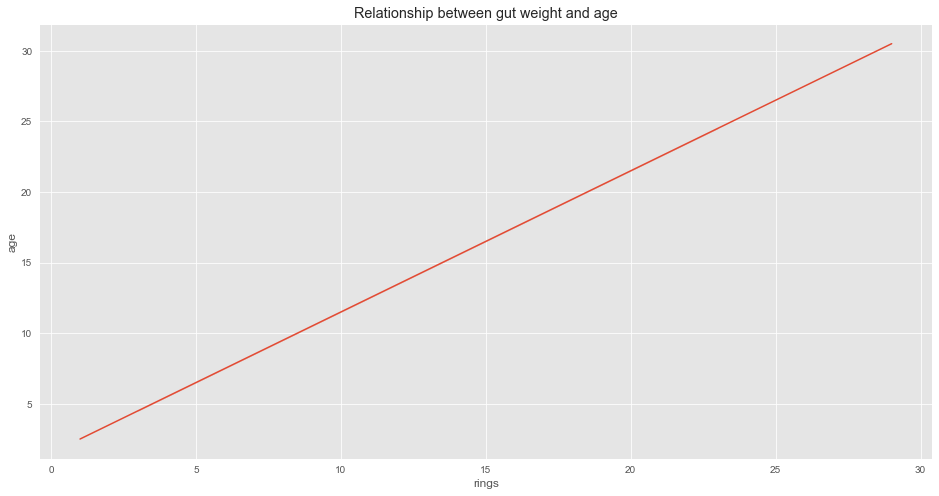

In [30]:
# line plot showing the relationship between viscera_wt and age
plt.figure(figsize=(16,8))
sns.lineplot(data=abalone_df, x='rings',
             y='age').set_title('Relationship between gut weight and age')
plt.show()

#### Observations
Age also increases as the number of rings in a shell cross-section grows, making it a reliable age indicator.

## Multivariate Analysis

### `whole_wt` ,`age` and `sex`

<Figure size 1152x576 with 0 Axes>

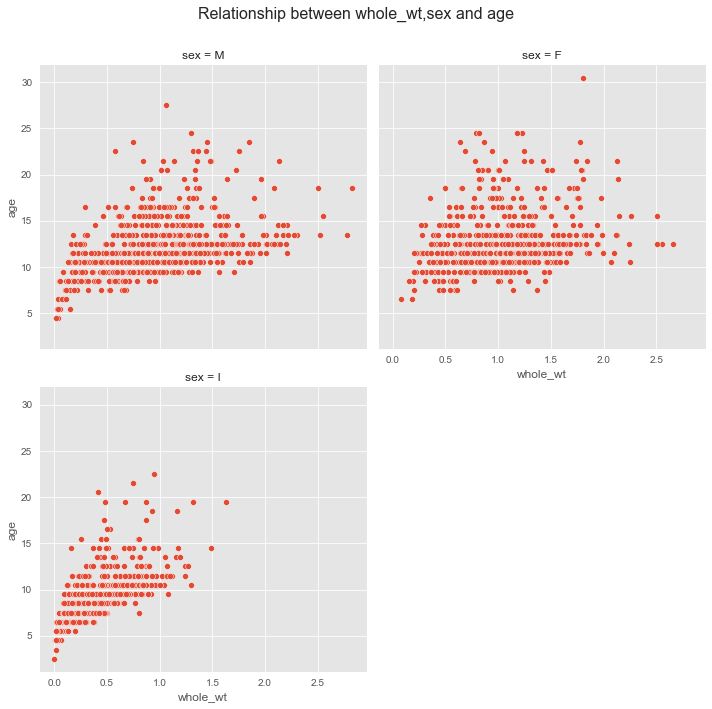

In [31]:
plt.figure(figsize=(16,8))
g = sns.relplot(x='whole_wt', y='age', data=abalone_df, col='sex',
            col_wrap=2)
g.figure.suptitle("Relationship between whole_wt,sex and age", size=16)
g.figure.subplots_adjust(top=.9)
plt.show()

#### Observation

* The average weight of infant is below 0.5
* The average weight of male is below 1
* The average weight of female is above 1
* The females are the heaviest

At 95% confidence interval

* The age range of infant is 0-16 years
* The age range of male is 6-25 years
* The age of the male is more spread
* The median of male and female is almost the same.
* The age range of female is 8-29 years.

For each sex category the relationship between weight and age is positively correlated i.e as age increases weight increases and vice versa.

## correlation heatmap

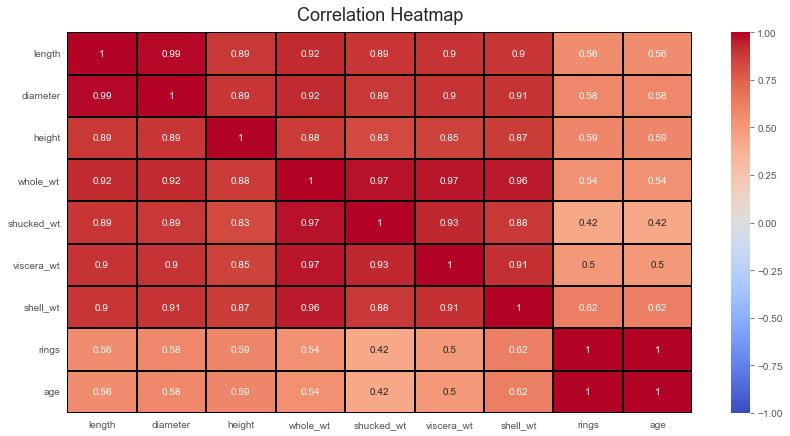

In [32]:
# correlation heatmap
plt.figure(figsize=(14, 7))

sns.heatmap(abalone_df.corr(),vmin=-1, vmax=1,center = 0,
            annot=True,cmap='coolwarm',linewidths=2,
            linecolor='black').set_title('Correlation Heatmap',fontdict={'fontsize':18}, pad=12);

# Data Preprocessing
- splitting data into training and test set
- scaling the data
- one hot encoding using pandas

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [34]:
# determining the dependent and independent variable
y = abalone_df['age']
X = abalone_df.drop(['age','rings'],axis =1)

In [35]:
# Splitting the data to training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2,random_state =42)

In [36]:
# Checking the shape of the split data
print(f'X_train has {X_train.shape[0]} rows and {X_train.shape[1]} columns')
print(f'X_test has {X_test.shape[0]} rows and {X_test.shape[1]} columns')
print(f'y_train has {y_train.shape[0]} rows')
print(f'y_test has {y_test.shape[0]} rows')

X_train has 1600 rows and 8 columns
X_test has 400 rows and 8 columns
y_train has 1600 rows
y_test has 400 rows


In [37]:
# Converting categorical variable into dummy variables for X_train
X_train_cat = pd.get_dummies(X_train.select_dtypes(include = ["object"]))

# Converting categorical variable into dummy variables for X_teest
X_test_cat = pd.get_dummies( X_test.select_dtypes(include = ["object"]))

# Concatenating Numerical values with dummy variables for X_train
X_train= pd.concat([X_train.select_dtypes(exclude = ["object"]),X_train_cat,],axis = 1)

# Concatenating Numerical values with dummy variables for X_test
X_test = pd.concat([X_test.select_dtypes(exclude = ["object"]),X_test_cat],axis = 1)

In [38]:
# instantiating standard scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Data Modelling
Models to be used are:
- LinearRegression
- RandomForestRegressor
- DecisionTreeRegressor
- AdaBoostRegressor
- XGBRegressor
- Lasso
- Ridge

### ` LinearRegression`

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


# instantiating linear regression model
lr = LinearRegression()
# fitting the model
lr.fit(X_train,y_train)

LinearRegression()

In [40]:
# Function to evaluate the models
def evaluation(model):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print("Train R^2 : ", r2_score(y_train, y_train_pred) *100)
    print("Test R^2 : ", r2_score(y_test, y_test_pred)*100)
    print('--------------------------------------')
    print("Train MAE :", mean_absolute_error(y_train, y_train_pred))
    print("Test MAE :", mean_absolute_error(y_test,y_test_pred))
    print('--------------------------------------')
    print("Train RMSE:",np.sqrt(mean_squared_error(y_train, y_train_pred)))
    print("Test RMSE:",np.sqrt(mean_squared_error(y_test, y_test_pred)))

In [41]:
# Evaluating linear regression model
print(evaluation(lr))

Train R^2 :  54.35631224328733
Test R^2 :  53.27357388681669
--------------------------------------
Train MAE : 1.5721135177069643
Test MAE : 1.7433186966959744
--------------------------------------
Train RMSE: 2.1729137639086016
Test RMSE: 2.5331213049499355
None


In [42]:
X_train

array([[-0.10214303, -0.01918149,  0.26953216, ..., -0.66245673,
        -0.68796548,  1.29444401],
       [ 0.34999915,  0.17914087,  0.52113744, ..., -0.66245673,
        -0.68796548,  1.29444401],
       [-1.33525805, -1.06037388, -1.36590219, ..., -0.66245673,
         1.4535613 , -0.77253245],
       ...,
       [ 0.59662215,  0.67494677,  0.52113744, ...,  1.50953255,
        -0.68796548, -0.77253245],
       [-0.3076622 , -0.26708444, -0.48528369, ..., -0.66245673,
         1.4535613 , -0.77253245],
       [ 0.30889531,  0.22872146,  0.14372952, ..., -0.66245673,
        -0.68796548,  1.29444401]])

In [43]:
# instantiating linear regression model
lr_2 = LinearRegression()
# fitting the model
lr.fit(X_train,y_train)

LinearRegression()

### `DecisionTreeRegressor`

#### Baseline model

In [44]:
# importing DecisionTreeRegressor library
from sklearn.tree import DecisionTreeRegressor

# Instantiating decision tree regressor
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [45]:
# Evaluating decision tree regressor baseline model
evaluation(dt)

Train R^2 :  100.0
Test R^2 :  27.052579215628615
--------------------------------------
Train MAE : 0.0
Test MAE : 2.1275
--------------------------------------
Train RMSE: 0.0
Test RMSE: 3.1650434436196924


Decision tree regressor baseline model is overfitting

### Tuned DecisionTreeRegressor

In [46]:
# creating  a grid parameter
dt_parameter_grid = [{'criterion':['squared_error', 'friedman_mse',"absolute_error", "poisson"],
                     'splitter':['best', 'random'],
                     'max_depth':[100,200,300,1000],'max_features':['auto', 'sqrt', 'log2'],
                     'max_leaf_nodes':[100,200,300,400],'min_samples_leaf':[5,10,20]}]

In [47]:
# Importing grid search cv
from sklearn.model_selection import GridSearchCV

# Instantiating grid search
dt_grid_search = GridSearchCV(dt,dt_parameter_grid,cv =3,scoring='neg_mean_absolute_error')
# Fitting the model
dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid=[{'criterion': ['squared_error', 'friedman_mse',
                                        'absolute_error', 'poisson'],
                          'max_depth': [100, 200, 300, 1000],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'max_leaf_nodes': [100, 200, 300, 400],
                          'min_samples_leaf': [5, 10, 20],
                          'splitter': ['best', 'random']}],
             scoring='neg_mean_absolute_error')

In [48]:
# getting the best parameters
dt_grid_search.best_params_

{'criterion': 'absolute_error',
 'max_depth': 1000,
 'max_features': 'auto',
 'max_leaf_nodes': 100,
 'min_samples_leaf': 20,
 'splitter': 'best'}

In [58]:
dt_tuned = DecisionTreeRegressor(criterion = 'absolute_error',max_depth = 1000,
                                 max_features ='auto',splitter ='best',max_leaf_nodes =100,
                                 min_samples_leaf = 20,
                                 random_state =42)
dt_tuned.fit(X_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=1000,
                      max_features='auto', max_leaf_nodes=100,
                      min_samples_leaf=20, random_state=42)

In [59]:
evaluation(dt_tuned)

Train R^2 :  56.89384327230983
Test R^2 :  44.35187709442795
--------------------------------------
Train MAE : 1.345
Test MAE : 1.78375
--------------------------------------
Train RMSE: 2.111649236970951
Test RMSE: 2.7643941470058135


The tuned decision tree regressor is still overfitting but its accuracy has improved.

### `Lasso`

#### Baseline model

In [60]:
# Importing lasso library
from sklearn.linear_model import Lasso
# instanting lasso
lasso_model = Lasso()
# fitting lasso
lasso_model.fit(X_train,y_train)

Lasso()

In [61]:
# Evaluating lasso baseline model
evaluation(lasso_model)

Train R^2 :  28.751560630872486
Test R^2 :  27.02877669296777
--------------------------------------
Train MAE : 1.9805789608295037
Test MAE : 2.1822894002185573
--------------------------------------
Train RMSE: 2.7148122863266595
Test RMSE: 3.165559773552972


lasso baseline model has a very low accuracy, i will hyperparameter tune to see if the accuracy will improve.

#### Tunned lasso model

In [64]:
# Creating a grid
seed = 42
lasso_grid = [{'alpha':[5, 0.5, 0.05, 0.005, 0.0005, 1, 0.1, 0.01,0.001, 0.0001, 0],
           'max_iter':[200,500,800,1000,1500],'selection':['cyclic', 'random'],
           'warm_start':[True,False]}]

lasso_grid = GridSearchCV(estimator=lasso_model, param_grid= lasso_grid)
lasso_grid.fit(X_train,y_train)

GridSearchCV(estimator=Lasso(),
             param_grid=[{'alpha': [5, 0.5, 0.05, 0.005, 0.0005, 1, 0.1, 0.01,
                                    0.001, 0.0001, 0],
                          'max_iter': [200, 500, 800, 1000, 1500],
                          'selection': ['cyclic', 'random'],
                          'warm_start': [True, False]}])

In [65]:
# Getting the best parameters from grid search
lasso_grid.best_params_

{'alpha': 0.0001, 'max_iter': 200, 'selection': 'random', 'warm_start': False}

In [66]:
# instantiating lasso model using the best parameters from grid search
lasso_tuned = Lasso(alpha=0.0001,max_iter=200, selection='random', warm_start= False)
# fitting the model
lasso_tuned.fit(X_train,y_train)
# Evaluating the tuned model
evaluation(lasso_tuned)

Train R^2 :  54.15461619918034
Test R^2 :  52.318970137918605
--------------------------------------
Train MAE : 1.5738996927944102
Test MAE : 1.752362772696804
--------------------------------------
Train RMSE: 2.1777094435544058
Test RMSE: 2.5588658514556717


## Deployment

In [67]:
import pickle as pkl  
import streamlit as smt  

with open("abalone.pkl", "wb") as f:
    pkl.dump(lasso_tuned, f)  
#pickle_out1.close()  

In [57]:

# loading in the model to predict on the data  
pickle_in1 = open('abalone.pkl', 'rb')  
abalone_model = pkl.load(pickle_in1)  
    
def welcome():  
    return 'welcome you all'  
    
# here, we will define the function which will make the prediction using the      # data which the user have imported  
def prediction1(sex, length, diameter, height, whole_wt, shucked_wt, viscera_wt, shell_wt):    
     
    prediction1 = abalone_model.predict(  
        [[sex, length, diameter, height, whole_wt, shucked_wt, viscera_wt, shell_wt]])  
    print(prediction1)  
    return prediction1  
        
    
# Here, this is the main function in which we will be defining our webpage   
def main():  
      # Now, we will give the title to out web page  
    smt.title("Iris Flower Prediction")  
        
    # Now, we will be defining some of the frontend elements of our web            # page like the colour of background and fonts and font size, the padding and    # the text to be displayed  
    html_temp = """  
    <div style = "background-colour: #FFFF00; padding: 16px">  
    <h1 style = "color: #000000; text-align: centre; "> Abalone age predictor app  
     </h1>  
    </div>  
    """  
        
    # Now, this line will allow us to display the front-end aspects we have   
    # defined in the earlier  
    smt.markdown(html_temp, unsafe_allow_html = True)  
        
    # Here, the following lines will create the text boxes in which the user can     # enter the data which is required for making the prediction  
    abalone_sex = smt.text_input ("sex ", " Type Here")  
    abalone_heightlength = smt.text_input ("length ", " Type Here")  
    abalone_diameter = smt.text_input ("diameter", " Type Here")  
    abalone_height = smt.text_input ("Height", " Type Here")
    abalone_whole_wt = smt.text_input ("whole wt", " Type Here")  
    abalone_shucked_wt = smt.text_input ("shucked wt", " Type Here")  
    abalone_viscera_wt = smt.text_input ("viscera wt", " Type Here")  
    abalone_shell_wt = smt.text_input ("shell wt", " Type Here")
    result = " "  
        
    # here, the below line will ensure that whenever the button named 'Predict' # is clicked, the prediction function that is defined earlier is called for making   # the prediction and it will also store it in the variable result  
    if smt.button ("Predict"):  
        result = prediction1 (sex, length, diameter, height, whole_wt,
                              shucked_wt, viscera_wt, shell_wt)  
    smt.success ('The output of the above is {}'.format(result))  
if __name__== '__main__':  
    main()  

2022-12-15 22:45:50.628 
  command:

    streamlit run c:\Users\janen\Documents\New folder\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
